**Fundamentals of Solar Cells and Photovoltaic Systems Engineering**

**Solutions Manual - Chapter 15**

**Problem 15.1**


**Consider a silicon solar cell that attains 20% efficiency on the ground under AM1.5G. Would this solar cell attain higher or lower efficiency in space (under AM0)? To answer this, use the reference spectra AM1.5G and AM0, and the quantum efficiency of a silicon solar cell provided in the online repository of this book.**

The extraterrestrial irradiance AM0 entails a higher irradiance on the solar cell and the solar cell is expected to generate a higher short-circuit current. To assess whether the efficiency under AM0 will be higher, we need to evaluate which of the two effects is more significant. 

We will use the package [pandas](https://pandas.pydata.org/) to handle the data and [matplotlib.pyplot](https://matplotlib.org/stable/index.html) to plot the results

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Similarly to Problem 3.6, we import the spectra data and the QE of the solar cell. 

In [15]:
datafile = pd.read_csv('data/Reference_spectrum_ASTM-G173-03.csv', index_col=0, header=0) 

In [16]:
datafile.drop(datafile.index[0], inplace=True) #remove row including information on units
datafile=datafile.astype(float) #convert values to float for easy operation
datafile.index=datafile.index.astype(float) #convert indexes to float for easy operation

We start by calculating the total irradiance AM0, AM1.5G and AM1.5D.

In [17]:
for spectra in ['AM0', 'AM1.5G', 'AM1.5D']:
    irradiance=np.trapz(datafile[spectra], x = datafile.index)
    print('Total irradiance in ' + spectra + ' = ' + str(irradiance.round(1)) + ' W/m2')

Total irradiance in AM0 = 1348.0 W/m2
Total irradiance in AM1.5G = 1000.5 W/m2
Total irradiance in AM1.5D = 900.2 W/m2


We can also plot the three spectra

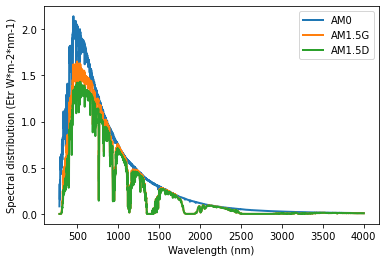

In [18]:
plt.plot(datafile, 
         linewidth=2, label=datafile.columns)
plt.ylabel('Spectral distribution (Etr W*m-2*nm-1)')
plt.xlabel('Wavelength (nm)')
plt.legend()

We define the relevant constants, import the Quantum Efficiency of the silicon solar cell and calculate the Spectral Response.

In [19]:
h=6.63*10**(-34) # [J·s] Planck constant
e=1.60*10**(-19) #C electron charge
c =299792458 #[m/s] Light speed

In [20]:
QE = pd.read_csv('data/QE_Silicon.csv', index_col=0, header=0) 

In [21]:
SR=pd.Series(index=QE.index,
            data=[QE.loc[i,'QE Silicon Solar cell']*e*i*0.000000001/(h*c) for i in QE.index])

First, we need to interpolate the spectra at those datapoints included in the SR. 

In [22]:
spectra=datafile['AM1.5G']
spectra_interpolated=np.interp(SR.index, spectra.index, spectra.values)

Then, we calculate the photocurrent density under AM1.5G using Eq. 3.5.

$J=\int SR(\lambda) \cdot G(\lambda) \ d\lambda$

In [23]:
J_AM15G = np.trapz([x*y for x,y in zip(SR, spectra_interpolated)], x=SR.index)*1000/10000 # A-> mA ; m2 -> cm2
print('Photocurrent density under AM1.5G = ' + str(J_AM15G.round(1)) + ' mA/cm2')

Photocurrent density under AM1.5G = 36.7 mA/cm2


No, we repeat the photocurrent density estimation under AM0. 

In [24]:
spectra=datafile['AM0']
spectra_interpolated=np.interp(SR.index, spectra.index, spectra.values)
J_AM0 = np.trapz([x*y for x,y in zip(SR, spectra_interpolated)], x=SR.index)*1000/10000 # A-> mA ; m2 -> cm2
print('Photocurrent density under AM0 = ' + str(J_AM0.round(1)) + ' mA/cm2')

Photocurrent density under AM0 = 44.5 mA/cm2


The increase in photocurrent density is lower than the increase in incident power. Hence, the efficiency of the silicon solar cell in space will be lower than on the ground.

In [25]:
J_AM0/J_AM15G

1.2124699811048598

In [26]:
AM0_AM15G=1348/1000.5
AM0_AM15G

1.3473263368315842